In [33]:
from IPython.display import Image
from google.colab import files

# subir la imagen a la sesión
uploaded = files.upload()

Saving datos argentina.png to datos argentina (3).png


In [1]:
import requests
import pandas as pd
import json
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
# Configurar pandas para que muestre toda la tabla sin truncar los datos
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

## IN POINT DE LA API
"/api/provincias",

"/api/departamentos",

"/api/municipios",

"/api/localidades-censales",

"/api/asentamientos",

"/api/localidades",

"/api/calles",

"/api/direcciones",

"/api/ubicacion"

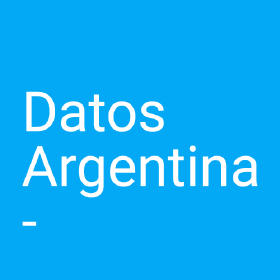

Solo usaremos Provincias, Municipio y Localidad

In [2]:
#API del Servicio de Normalización de Datos Geográficos de Argentina
provincias=requests.get("https://apis.datos.gob.ar/georef/api/provincias")
municipios=requests.get("https://apis.datos.gob.ar/georef/api/municipios?max=3000")
localidades=requests.get("https://apis.datos.gob.ar/georef/api/localidades?max=5000")
print(provincias)
print(municipios)
print(localidades)

#traemos las datos .json
provincias=json.loads(provincias.content)
municipios=json.loads(municipios.content)
localidades=json.loads(localidades.content)


<Response [200]>
<Response [200]>
<Response [200]>


como se ve el acceso es correcto, nos da codigo 200 de conexion y luego se meustra el .json

##Data Wrangling
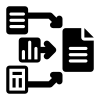

In [3]:
#convertimos en DF
df_provincias=pd.DataFrame(provincias['provincias'])
df_municipios=pd.DataFrame(municipios['municipios'])
df_localidades=pd.DataFrame(localidades['localidades'])

In [4]:
print(df_provincias.shape)
print(df_municipios.shape)
print(df_localidades.shape)

(24, 3)
(1814, 4)
(4142, 8)


#### 🔍 TRATAMIENTO DE NULOS

Valores nulos en df_provincias:
centroide    0
id           0
nombre       0
dtype: int64
Valores nulos en df_municipios:
centroide    0
id           0
nombre       0
provincia    0
dtype: int64
Valores nulos en df_localidades:
categoria           0
centroide           0
departamento        0
id                  0
localidad_censal    0
municipio           0
nombre              0
provincia           0
dtype: int64


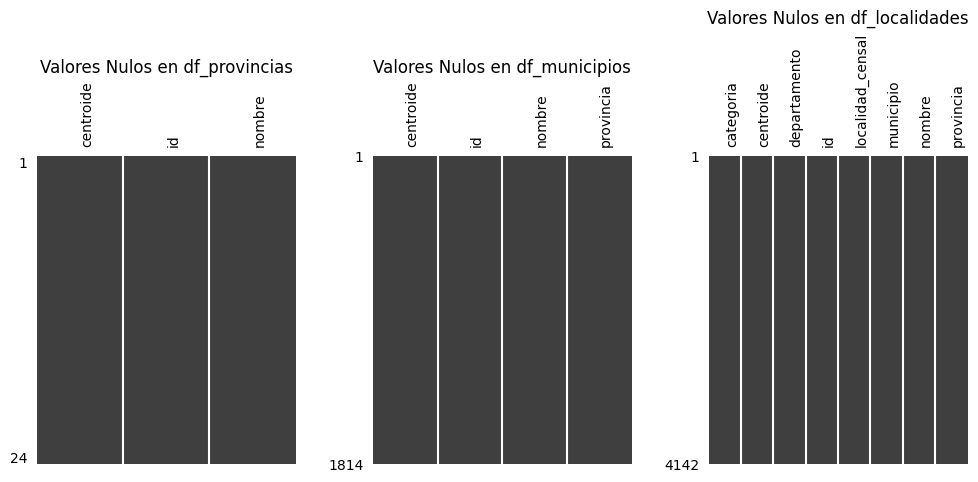

In [6]:
import missingno as msno
import matplotlib.pyplot as plt

# Crear una lista con los DataFrames
dataframes = [("df_provincias", df_provincias), 
              ("df_municipios", df_municipios), 
              ("df_localidades", df_localidades)]

# Ajustar tamaño de figura y márgenes
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
fig.subplots_adjust(wspace=0.3, hspace=0.5)

# Iterar a través de los DataFrames y mostrar la matriz de correlación de valores nulos
for i, (df_name, df) in enumerate(dataframes):
    print("Valores nulos en {}:".format(df_name))
    print(df.isnull().sum())
    msno.matrix(df, ax=axs[i])
    axs[i].set_title(f"Valores Nulos en {df_name}", fontsize=12)
    axs[i].tick_params(axis='x', labelrotation=90, labelsize=10)
    axs[i].tick_params(axis='y', labelrotation=0, labelsize=10)

# Muestro la figura
plt.show()

♦♦ Conclucion, no se detectan datos nulos

In [8]:
# Realizo un loop para shape, head, info, dsecribe
for df_name, df in [("PROVINCIA", df_provincias), ("MUNICIPIOS", df_municipios), ("LOCALIDADES", df_localidades)]:
    print(f"DF {df_name}")
    print(f"{'-'*50}")
    print("COLUMNAS Y FILAS:")
    print(df.shape)
    print("\n")
    print(f"{'-'*20}")
    print("PRIMERAS FILAS:")
    print(df.head())
    print("\n")
    print(f"{'-'*20}")
    print("INFORMACION:")
    print(df.info())
    print("\n")
    print(f"{'-'*20}")
    print("ESTADISTICAS:")
    print(df.describe())
    print("\n")
    print(f"{'='*50}")
    


DF PROVINCIA
--------------------------------------------------
COLUMNAS Y FILAS:
(24, 3)


--------------------
PRIMERAS FILAS:
                                           centroide  id      nombre
0  {'lat': -26.8753965086829, 'lon': -54.65169662...  54    Misiones
1  {'lat': -33.7577257449137, 'lon': -66.02812981...  74    San Luis
2  {'lat': -30.8653679979618, 'lon': -68.88949084...  70    San Juan
3  {'lat': -32.0588735436448, 'lon': -59.20144755...  30  Entre Ríos
4  {'lat': -48.8154851827063, 'lon': -69.95576216...  78  Santa Cruz


--------------------
INFORMACION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   centroide  24 non-null     object
 1   id         24 non-null     object
 2   nombre     24 non-null     object
dtypes: object(3)
memory usage: 704.0+ bytes
None


--------------------
ESTADISTICAS:
                                     

## NORMALIZACION DE LOS DF

---


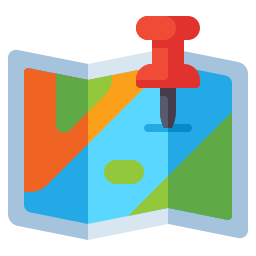

### <span style="color:rgb(50,100,100);"><strong>&#128304; PROVINCIA:&#128304;</strong></span>

---



In [9]:
print("df_provincias:")
df_provincias.head(5)

df_provincias:


,centroide,id,nombre
0,"{'lat': -26.8753965086829, 'lon': -54.65169662...",54,Misiones
1,"{'lat': -33.7577257449137, 'lon': -66.02812981...",74,San Luis
2,"{'lat': -30.8653679979618, 'lon': -68.88949084...",70,San Juan
3,"{'lat': -32.0588735436448, 'lon': -59.20144755...",30,Entre Ríos
4,"{'lat': -48.8154851827063, 'lon': -69.95576216...",78,Santa Cruz


'centroide' contienen diccionarios. Procedemos a normalizar

In [10]:
# Normaliza las columnas 'centroide' en nuevas columnas
centroide_df = pd.json_normalize(df_provincias['centroide'])

# Combina el nuevo DataFrame con el DataFrame original
df2_provincias = pd.concat([df_provincias.drop(['centroide'], axis=1), centroide_df], axis=1)

#renombro ID
df2_provincias = df2_provincias.rename(columns={'id': 'id_prov','lat':'lat_prov','lon':'lon_prov','nombre': 'nombre_prov'})

# Muestra el nuevo DataFrame
df2_provincias.head(5)

,id_prov,nombre_prov,lat_prov,lon_prov
0,54,Misiones,-26.875397,-54.651697
1,74,San Luis,-33.757726,-66.028130
2,70,San Juan,-30.865368,-68.889491
3,30,Entre Ríos,-32.058874,-59.201448
4,78,Santa Cruz,-48.815485,-69.955762


### <span style="color:rgb(50,100,100);"><strong>&#128304; MUNICIPIOS:&#128304;</strong></span>


---



In [11]:
print("df_municipios:")
df_municipios.head(5)

df_municipios:


,centroide,id,nombre,provincia
0,"{'lat': -22.1949119799291, 'lon': -65.34128642...",386273,Yavi,"{'id': '38', 'nombre': 'Jujuy'}"
1,"{'lat': -22.414030404424, 'lon': -65.379531029...",386259,El Cóndor,"{'id': '38', 'nombre': 'Jujuy'}"
2,"{'lat': -22.4438999595476, 'lon': -65.54057513...",386252,Cangrejillos,"{'id': '38', 'nombre': 'Jujuy'}"
3,"{'lat': -22.8431449411788, 'lon': -66.03226821...",380014,Abra Pampa,"{'id': '38', 'nombre': 'Jujuy'}"
4,"{'lat': -22.9377695400232, 'lon': -65.54507430...",386063,Tres Cruces,"{'id': '38', 'nombre': 'Jujuy'}"


In [13]:
# Normaliza las columnas 'centroide' y 'provincia' en nuevas columnas
centroide_df2 = pd.json_normalize(df_municipios['centroide'])
provincia_df2 = pd.json_normalize(df_municipios['provincia'])

#como veo que va a existir conflicto con el nombre ID del municipio y el ID del diccionario de la Provincia, realizo los camibos de antemano y renombro como corresponde.
provincia_df2 = provincia_df2.rename(columns={'id': 'id_prov', 'nombre': 'nombre_prov'})

# Combina el nuevo DataFrame con el DataFrame original
df2_municipios = pd.concat([df_municipios.drop(['centroide', 'provincia'], axis=1), centroide_df2, provincia_df2], axis=1)

#renombro ID
df2_municipios = df2_municipios.rename(columns={'id': 'id_muni','nombre': 'nombre_muni','lat':'lat_muni','lon':'lon_muni',})

# Muestra el nuevo DataFrame
df2_municipios.head(5)

,id_muni,nombre_muni,lat_muni,lon_muni,id_prov,nombre_prov
0,386273,Yavi,-22.194912,-65.341286,38,Jujuy
1,386259,El Cóndor,-22.414030,-65.379531,38,Jujuy
2,386252,Cangrejillos,-22.443900,-65.540575,38,Jujuy
3,380014,Abra Pampa,-22.843145,-66.032268,38,Jujuy
4,386063,Tres Cruces,-22.937770,-65.545074,38,Jujuy


### <span style="color:rgb(50,100,100);"><strong>&#128304; LOCALIDADES:&#128304;</strong></span>

---



In [14]:
print("df_localidades:")
df_localidades.head(5)

df_localidades:


,categoria,centroide,departamento,id,localidad_censal,municipio,nombre,provincia
0,Localidad simple,"{'lat': -33.4394729739475, 'lon': -64.83166108...","{'id': '14098', 'nombre': 'Río Cuarto'}",14098270000,"{'id': '14098270', 'nombre': 'Suco'}","{'id': '142588', 'nombre': 'Suco'}",SUCO,"{'id': '14', 'nombre': 'Córdoba'}"
1,Entidad,"{'lat': -28.407625810512, 'lon': -67.096154631...","{'id': '46119', 'nombre': 'San Blas de Los Sau...",46119010008,"{'id': '46119010', 'nombre': 'Salicas - San Bl...","{'id': '460119', 'nombre': 'San Blas de los Sa...",SALICAS,"{'id': '46', 'nombre': 'La Rioja'}"
2,Componente de localidad compuesta,"{'lat': -34.6132917290185, 'lon': -58.38875173...","{'id': None, 'nombre': None}",02000010000,"{'id': '02000010', 'nombre': 'Ciudad Autónoma ...","{'id': None, 'nombre': None}",CIUDAD DE BUENOS AIRES,"{'id': '02', 'nombre': 'Ciudad Autónoma de Bue..."
3,Localidad simple,"{'lat': -37.1774801030509, 'lon': -62.75789626...","{'id': '06007', 'nombre': 'Adolfo Alsina'}",06007010000,"{'id': '06007010', 'nombre': 'Carhué'}","{'id': '060007', 'nombre': 'Adolfo Alsina'}",CARHUE,"{'id': '06', 'nombre': 'Buenos Aires'}"
4,Localidad simple,"{'lat': -37.4486186469627, 'lon': -63.11760940...","{'id': '06007', 'nombre': 'Adolfo Alsina'}",06007020000,"{'id': '06007020', 'nombre': 'Colonia San Migu...","{'id': '060007', 'nombre': 'Adolfo Alsina'}",COLONIA SAN MIGUEL ARCANGEL,"{'id': '06', 'nombre': 'Buenos Aires'}"


In [15]:
# Normaliza las columnas 'centroide' y 'provincia' en nuevas columnas
centroide_df3 = pd.json_normalize(df_localidades['centroide'])
provincia_df3 = pd.json_normalize(df_localidades['provincia'])
municipio_df3 = pd.json_normalize(df_localidades['municipio'])

#como veo que va a existir conflicto con el nombre ID del municipio y el ID del diccionario de la Provincia, realizo los camibos de antemano y renombro como corresponde.
provincia_df3 = provincia_df3.rename(columns={'id': 'id_prov', 'nombre': 'nombre_prov'})
municipio_df3 = municipio_df3.rename(columns={'id': 'id_muni', 'nombre': 'nombre_muni'})

# Combina el nuevo DataFrame con el DataFrame original
df2_localidades = pd.concat([df_localidades.drop(['centroide', 'provincia','departamento','municipio','localidad_censal','categoria'], axis=1), centroide_df3, provincia_df3, municipio_df3], axis=1)

#renombro ID
df2_localidades = df2_localidades.rename(columns={'id': 'id_loc','nombre': 'nombre_loc','lat':'lat_loc','lon':'lon_loc',})

# Muestra el nuevo DataFrame
df2_localidades.head(5)

,id_loc,nombre_loc,lat_loc,lon_loc,id_prov,nombre_prov,id_muni,nombre_muni
0,14098270000,SUCO,-33.439473,-64.831661,14,Córdoba,142588,Suco
1,46119010008,SALICAS,-28.407626,-67.096155,46,La Rioja,460119,San Blas de los Sauces
2,02000010000,CIUDAD DE BUENOS AIRES,-34.613292,-58.388752,02,Ciudad Autónoma de Buenos Aires,None,None
3,06007010000,CARHUE,-37.177480,-62.757896,06,Buenos Aires,060007,Adolfo Alsina
4,06007020000,COLONIA SAN MIGUEL ARCANGEL,-37.448619,-63.117609,06,Buenos Aires,060007,Adolfo Alsina


♦♦ Luego de hacer una normalizacion de los datos, pasamos a generar un DF unico con la funsion MARGE, Uniremos la Tabla localidad con los ID de Provincia y Municipio y traeremos la GeoLocalizacion en lat y lon.

In [16]:
print('provincia')
print(df2_provincias.columns)
print(df2_provincias.shape)
print('-----')
print('municipios')
print(df2_municipios.columns)
print(df2_municipios.shape)
print('-----')
print('locaidad')
print(df2_localidades.columns)
print(df2_localidades.shape)


provincia
Index(['id_prov', 'nombre_prov', 'lat_prov', 'lon_prov'], dtype='object')
(24, 4)
-----
municipios
Index(['id_muni', 'nombre_muni', 'lat_muni', 'lon_muni', 'id_prov',
       'nombre_prov'],
      dtype='object')
(1814, 6)
-----
locaidad
Index(['id_loc', 'nombre_loc', 'lat_loc', 'lon_loc', 'id_prov', 'nombre_prov',
       'id_muni', 'nombre_muni'],
      dtype='object')
(4142, 8)


In [21]:
# Merge de los DataFrames 'provincia' y 'municipios' mediante la columna 'id_prov'
df_temp = pd.merge(df2_provincias, df2_municipios, on='id_prov')

# Merge de 'df_temp' y 'localidad' mediante las columnas 'id_prov' e 'id_muni'
df_geoloc = pd.merge(df_temp, df2_localidades, on=['id_prov', 'id_muni'])

#para ver mejor las columnas las pongo en lista vertical
for column in df_geoloc.columns:
    print(column)

#selecciono las que no voy a usar
df_geoloc = df_geoloc[['id_prov','nombre_prov','lat_prov','lon_prov','id_muni','nombre_muni_x','lat_muni','lon_muni','id_loc','nombre_loc','lat_loc','lon_loc']]

df_geoloc.head()


id_prov
nombre_prov_x
lat_prov
lon_prov
id_muni
nombre_muni_x
lat_muni
lon_muni
nombre_prov_y
id_loc
nombre_loc
lat_loc
lon_loc
nombre_prov
nombre_muni_y


,id_prov,nombre_prov,lat_prov,lon_prov,id_muni,nombre_muni_x,lat_muni,lon_muni,id_loc,nombre_loc,lat_loc,lon_loc
0,54,Misiones,-26.875397,-54.651697,540007,Apóstoles,-27.902502,-55.721730,54007010000,APOSTOLES,-27.909807,-55.753213
1,54,Misiones,-26.875397,-54.651697,540007,Apóstoles,-27.902502,-55.721730,54007025000,BARRIO RURAL,-27.883919,-55.785781
2,54,Misiones,-26.875397,-54.651697,540007,Apóstoles,-27.902502,-55.721730,54007030000,ESTACION APOSTOLES,-27.907959,-55.807958
3,54,Misiones,-26.875397,-54.651697,540028,Tres Capones,-27.991815,-55.614138,54007070000,TRES CAPONES,-28.000087,-55.608043
4,54,Misiones,-26.875397,-54.651697,540084,Mártires,-27.419274,-55.381874,54021050000,MARTIRES,-27.418865,-55.377794


In [22]:
df_geoloc.shape

(3595, 12)

In [23]:
#valores duplicados en DF final
duplicados = df_geoloc[df_geoloc.duplicated()]
print("Valores duplicados en df_geoloc:")
print(duplicados)

Valores duplicados en df_geoloc:
Empty DataFrame
Columns: [id_prov, nombre_prov, lat_prov, lon_prov, id_muni, nombre_muni_x, lat_muni, lon_muni, id_loc, nombre_loc, lat_loc, lon_loc]
Index: []


##**PLOTEO**

---



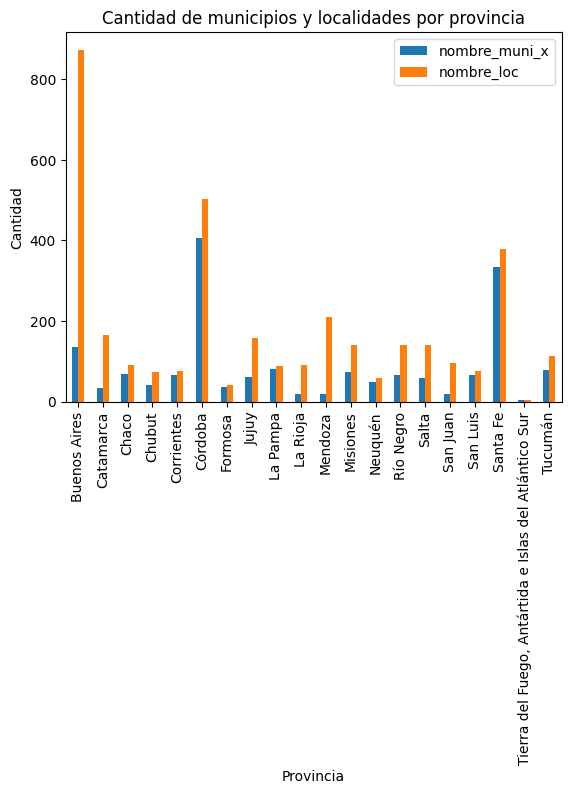

In [24]:
import matplotlib.pyplot as plt

# Agrupar por provincia y contar el número de municipios y localidades en cada provincia
df_geoloc2 = df_geoloc.groupby('nombre_prov')[['nombre_muni_x', 'nombre_loc']].nunique()

# Crear el gráfico de barras
df_geoloc2.plot(kind='bar')
plt.title('Cantidad de municipios y localidades por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.show()
